In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [21]:
from sklearn.model_selection import cross_val_score,KFold
from sklearn.neighbors import KNeighborsRegressor
#generate dataset
x=np.linspace(-3,3,100)

rng = np.random.RandomState(42)
y = np.sin(4 * x) + x + rng.normal(size=len(x))
X = x[:, np.newaxis]
cv=KFold(shuffle=True)
for n_neighbors in [1,2,3,4,5,6,7,8,9,10,20]:
    scores=cross_val_score(KNeighborsRegressor(n_neighbors=n_neighbors),X,y,cv=cv)
    print(n_neighbors,np.mean(scores))

1 0.6681190374822951
2 0.6975575316757879
3 0.7010257950943585
4 0.7717115998530347
5 0.7579753090982825
6 0.7015988545762414
7 0.7255442643222757
8 0.7261086961229598
9 0.7201236061958562
10 0.7069648402616823
20 0.6312637748063689


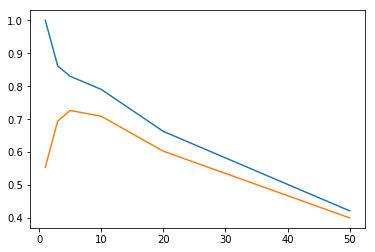

In [29]:
from sklearn.model_selection import validation_curve
n_neighbors=[1,3,5,10,20,50]
train_errors, test_errors = validation_curve(KNeighborsRegressor(), X, y, param_name="n_neighbors",param_range=n_neighbors, cv=cv)
plt.plot(n_neighbors,train_errors.mean(axis=1),label='train_error')
plt.plot(n_neighbors,test_errors.mean(axis=1),label='test_error')


In [83]:
from sklearn.model_selection import cross_val_score,KFold
from sklearn.svm import SVR
cv=KFold(shuffle=True,n_splits=5)
for C in [0.001,0.01,0.1,1,10]:
    for gamma in [0.001,0.01,0.1,1]:
        scores=cross_val_score(SVR(C=C,gamma=gamma),X,y,cv=cv)
        print(C,gamma,scores)

0.001 0.001 [-0.02454244 -0.00745313 -0.15149094 -0.01049684 -0.21385255]
0.001 0.01 [-0.07531368 -0.11040082 -0.12247215 -0.00602645 -0.07392719]
0.001 0.1 [-0.53130683 -0.10845441 -0.15711185  0.00958363 -0.00363186]
0.001 1 [-0.02596124 -0.07537616 -0.002692   -0.14180914 -0.00111284]
0.01 0.001 [ 2.46070672e-03 -1.43868378e+00 -1.37114665e-04 -1.63816430e-01
 -1.99297213e-01]
0.01 0.01 [-0.07769815  0.02072738 -0.13780299 -0.00175641  0.01816889]
0.01 0.1 [0.11751179 0.09410143 0.10891797 0.1443137  0.1218066 ]
0.01 1 [-0.11856205  0.03221161  0.00886996  0.09497797  0.06532171]
0.1 0.001 [-0.25043629 -0.04331115  0.02087527  0.03017682  0.02686874]
0.1 0.01 [0.19723941 0.11261943 0.18773758 0.11466475 0.20344128]
0.1 0.1 [0.56105073 0.54285596 0.51950385 0.48360883 0.58472963]
0.1 1 [0.51769012 0.51571358 0.41342997 0.64038073 0.48039485]
1 0.001 [0.20434505 0.14121697 0.22002469 0.27425113 0.19176253]
1 0.01 [0.60539879 0.57989528 0.66364316 0.58425898 0.57091593]
1 0.1 [0.531307

In [84]:
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.001,0.01,0.1,1,10],'gamma':[0.001,0.01,0.1,1]}
grid=GridSearchCV(SVR(),param_grid=param_grid,cv=cv,verbose=3,n_jobs=-1)

In [85]:
grid.fit(X,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] C=0.001, gamma=0.001 ............................................
[CV] . C=0.001, gamma=0.001, score=-0.16954547586842073, total=   0.0s
[CV] C=0.001, gamma=0.001 ............................................
[CV]  C=0.001, gamma=0.001, score=-8.359360730025855e-05, total=   0.0s
[CV] C=0.001, gamma=0.001 ............................................
[CV] . C=0.001, gamma=0.001, score=-0.16304978231659728, total=   0.0s
[CV] C=0.001, gamma=0.001 ............................................
[CV] . C=0.001, gamma=0.001, score=-0.13115042445127356, total=   0.0s
[CV] C=0.001, gamma=0.001 ............................................
[CV] . C=0.001, gamma=0.001, score=-0.08033495492660414, total=   0.0s
[CV] C=0.001, gamma=0.01 .............................................
[CV] ... C=0.001, gamma=0.01, score=-0.1660153837993179, total=   0.0s
[CV] C=0.001, gamma=0.01 .............................................
[CV] .. C=0.00

[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=1, gamma=0.001 ................................................
[CV] ...... C=1, gamma=0.001, score=0.12482185021932923, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ...... C=1, gamma=0.001, score=0.13650277038750458, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ...... C=1, gamma=0.001, score=0.17554588907174218, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........ C=1, gamma=0.01, score=0.6527077938710447, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........ C=1, gamma=0.01, score=0.5968965793923695, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........ C=1, gamma=0.01, score=0.5025460266044297, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........ C=1, gamma=0.01, score=0.5508218538321799, total=   0.0s
[CV] 

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
       error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [74]:
grid.predict(X)

array([-1.79762875, -1.74054091, -1.71412904, -1.72272347, -1.76880247,
       -1.8527208 , -1.97255382, -2.12407501, -2.30087676, -2.49463429,
       -2.695503  , -2.89262935, -3.07474705, -3.23082299, -3.35071314,
       -3.42578612, -3.44947391, -3.41771237, -3.32924127, -3.18574205,
       -2.9918017 , -2.75470244, -2.48404785, -2.19124658, -1.88888388,
       -1.59001819, -1.30744475, -1.05297034, -0.8367425 , -0.66667333,
       -0.54799235, -0.4829551 , -0.4707249 , -0.50743515, -0.58642852,
       -0.69865919, -0.83323456, -0.97806438, -1.12057877, -1.24847261,
       -1.35043139, -1.41679516, -1.44012026, -1.41560488, -1.3413525 ,
       -1.21845724, -1.05090633, -0.84530623, -0.61045003, -0.35675398,
       -0.09559933,  0.16137852,  0.40300817,  0.61926205,  0.80185531,
        0.94472644,  1.04437082,  1.10000798,  1.11357463,  1.08954695,
        1.03460678,  0.95717608,  0.86685224,  0.7737823 ,  0.68801751,
        0.61888941,  0.57444669,  0.56098656,  0.58270777,  0.64

In [75]:
print(grid.best_score_)
print(grid.best_params_)

0.6903301986117377
{'C': 10, 'gamma': 1}


In [80]:
from sklearn.model_selection import GridSearchCV,KFold,train_test_split
from sklearn.svm import SVR
cv=KFold(n_splits=10,shuffle=True)
x_train,x_test,y_train,y_test=train_test_split(X,y)
param_grid={'C': [0.001, 0.01, 0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1]}
grid=GridSearchCV(SVR(),param_grid=param_grid,cv=cv)
grid.fit(x_train,y_train)
grid.score(x_test,y_test)

0.8297095612745424

In [81]:
grid.best_params_

{'C': 10, 'gamma': 1}

In [88]:
from sklearn.model_selection import ShuffleSplit
single_split_cv=ShuffleSplit(n_splits=1)
print(single_split_cv)
grid=GridSearchCV(SVR(),param_grid=param_grid,cv=single_split_cv,verbose=3)
grid.fit(x_train,y_train)
grid.score(x_test,y_test)

ShuffleSplit(n_splits=1, random_state=None, test_size='default',
       train_size=None)
Fitting 1 folds for each of 20 candidates, totalling 20 fits
[CV] C=0.001, gamma=0.001 ............................................
[CV] ... C=0.001, gamma=0.001, score=-0.206726172070226, total=   0.0s
[CV] C=0.001, gamma=0.01 .............................................
[CV] .. C=0.001, gamma=0.01, score=-0.20455689553807388, total=   0.0s
[CV] C=0.001, gamma=0.1 ..............................................
[CV] .... C=0.001, gamma=0.1, score=-0.1944186516160644, total=   0.0s
[CV] C=0.001, gamma=1 ................................................
[CV] ..... C=0.001, gamma=1, score=-0.19413857093723366, total=   0.0s
[CV] C=0.01, gamma=0.001 .............................................
[CV] .. C=0.01, gamma=0.001, score=-0.20435286036857847, total=   0.0s
[CV] C=0.01, gamma=0.01 ..............................................
[CV] ... C=0.01, gamma=0.01, score=-0.18302310853383832, total=   0.0

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.1s finished


0.5323004018122492

In [89]:
grid=GridSearchCV(SVR(),param_grid=param_grid)
grid.fit(x_train,y_train)
grid.score(x_test,y_test)

0.7494202025201924